In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers 
import seaborn as sns

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
bc = datasets.load_boston()#housing dataset, 2007

In [ ]:
print(bc)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [ ]:
print(bc.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [ ]:
print(bc.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
boston = pd.DataFrame(bc.data, columns = bc.feature_names)

In [ ]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
boston['PRICE'] = bc.target

In [ ]:
boston['PRICE'].head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [ ]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

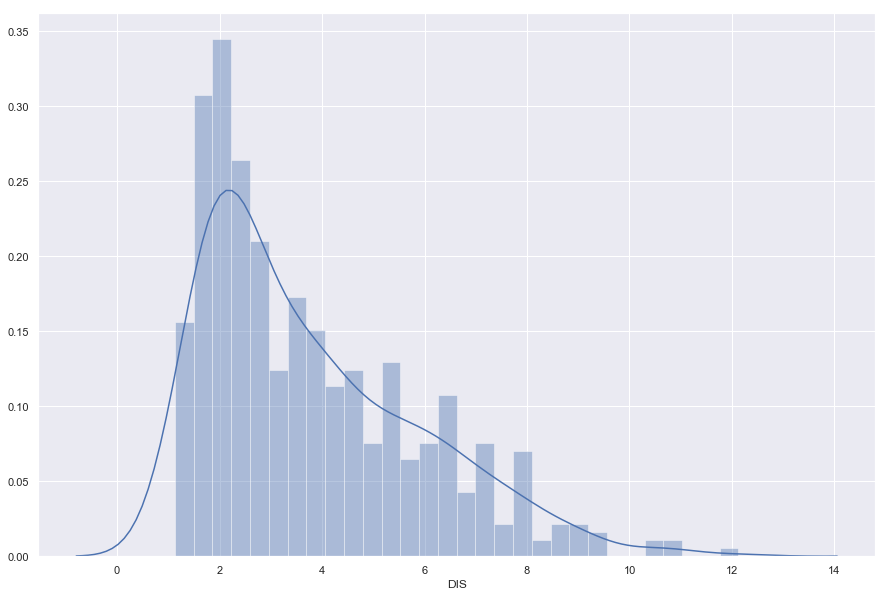

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(boston['DIS'], bins=30)
plt.show()

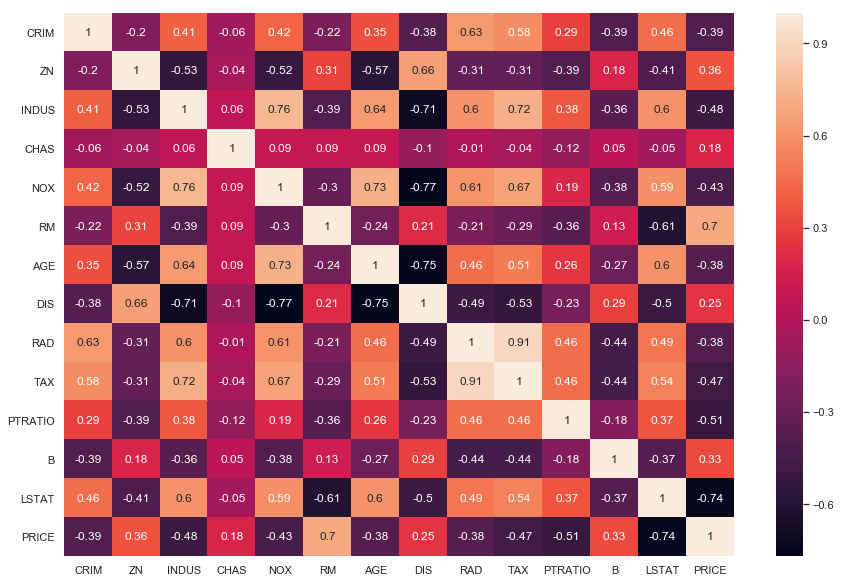

In [ ]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


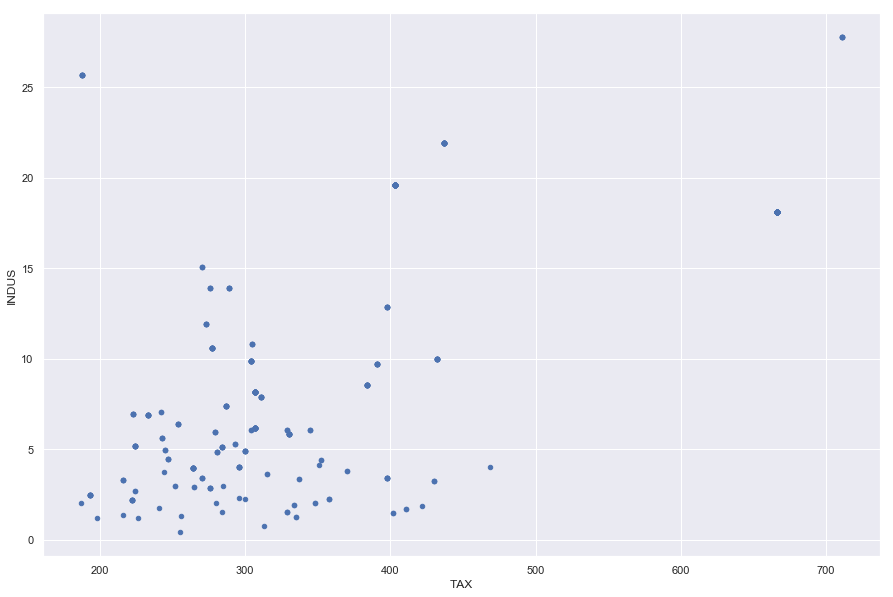

In [ ]:
boston.plot.scatter(x='TAX', y='INDUS')

In [ ]:
X = bc.data
Y = bc.target

In [ ]:
print(X.shape, Y.shape)

(506, 13) (506,)


Creating model 

In [ ]:
network = tf.keras.Sequential()
network.add(layers.Dense(128, activation='relu', input_shape=(13,)))
#network.add(layers.Dropout(0.5))
network.add(layers.Dense(64, activation='relu'))
#network.add(layers.Dropout(0.5))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(1))

In [ ]:
network.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.01), loss= 'mse', metrics=['mae'])

C:\Users\R1007398\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
print(network.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 128)               1792      
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 33        
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


#Preprocessing of dataset- Normalization

In [ ]:
train_X = preprocessing.normalize(X_train)
test_X = preprocessing.normalize(X_test)

In [ ]:
train_X[0:5]

array([[1.97719051e-02, 0.00000000e+00, 2.38209381e-02, 0.00000000e+00,
        8.08069392e-04, 6.98045612e-03, 1.28053993e-01, 2.76467650e-03,
        3.15857743e-02, 8.76505236e-01, 2.65846934e-02, 4.59941516e-01,
        3.27834016e-02],
       [1.24337732e-03, 0.00000000e+00, 1.61320572e-02, 0.00000000e+00,
        1.06622197e-03, 1.15619683e-02, 1.11973125e-01, 8.91543891e-03,
        7.92730086e-03, 6.08420341e-01, 4.16183295e-02, 7.84049691e-01,
        1.67860596e-02],
       [7.29281484e-05, 7.36435428e-02, 1.27508534e-02, 0.00000000e+00,
        9.21385926e-04, 1.26898345e-02, 4.90255585e-02, 1.39727050e-02,
        2.10410122e-03, 6.39646772e-01, 3.55593107e-02, 7.62210668e-01,
        1.64751126e-02],
       [1.04781794e-02, 0.00000000e+00, 2.68998226e-02, 0.00000000e+00,
        9.12513318e-04, 9.07014459e-03, 1.26473751e-01, 3.00475477e-03,
        3.56682730e-02, 9.89794576e-01, 3.00207965e-02, 3.74516867e-03,
        3.46130866e-02],
       [1.44405380e-03, 0.00000000e+

In [ ]:
history = network.fit(train_X, Y_train, epochs=100, validation_data = (test_X, Y_test), batch_size= 1)

Epoch 1/100
404/404 [==============================] - 1s 1ms/step - loss: 96.5115 - mae: 7.0250 - val_loss: 42.7776 - val_mae: 4.5339
Epoch 2/100
404/404 [==============================] - 0s 1ms/step - loss: 75.9229 - mae: 6.1816 - val_loss: 43.8001 - val_mae: 4.9562
Epoch 3/100
404/404 [==============================] - 0s 1ms/step - loss: 69.2190 - mae: 5.7515 - val_loss: 97.5923 - val_mae: 9.1196
Epoch 4/100
404/404 [==============================] - 0s 1ms/step - loss: 61.5906 - mae: 5.5757 - val_loss: 32.6249 - val_mae: 3.7703
Epoch 5/100
404/404 [==============================] - 0s 1ms/step - loss: 59.6134 - mae: 5.4027 - val_loss: 36.2988 - val_mae: 3.6439
Epoch 6/100
404/404 [==============================] - 0s 1ms/step - loss: 54.2783 - mae: 5.1918 - val_loss: 26.5432 - val_mae: 3.3709
Epoch 7/100
404/404 [==============================] - 1s 1ms/step - loss: 54.4215 - mae: 5.1052 - val_loss: 26.0861 - val_mae: 3.2135
Epoch 8/100
404/404 [==============================] - 

In [ ]:
print(Y_test[0])

23.6


In [ ]:
pred_Y = network.predict(np.reshape(test_X[0], (-1, 13)))

In [ ]:
print(pred_Y[0][0])

36.84289


In [ ]:
vals = []
for i in range(0, Y_test.__len__()):
    val = network.predict(np.reshape(test_X[i], (-1, 13)))
    vals.append(val[0][0])

In [ ]:
print(vals.__len__())

102


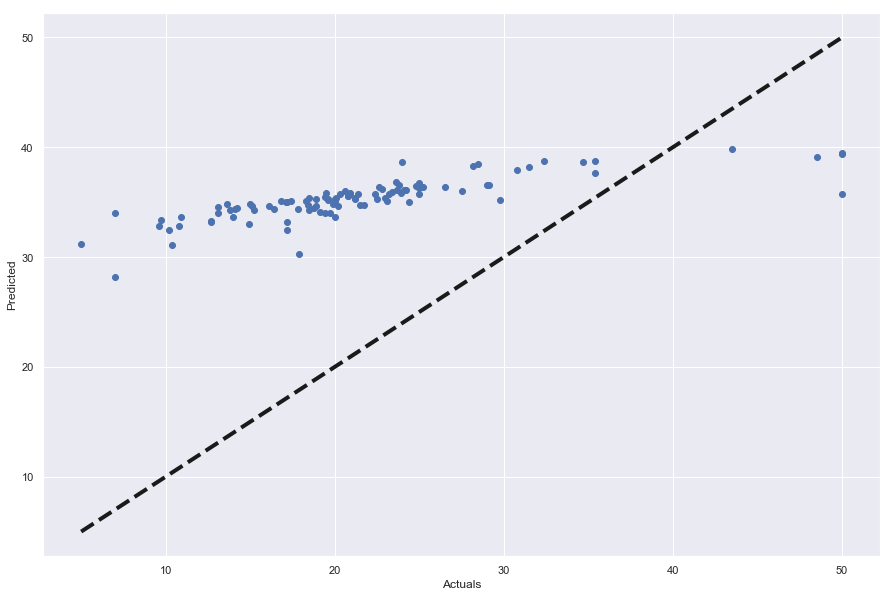

In [ ]:
fig, ax = plt.subplots()
ax.scatter(Y_test, vals)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Actuals')
ax.set_ylabel('Predicted')
plt.show()